<a href="https://colab.research.google.com/github/Perception12/fashion_mnist_prediction/blob/main/fashion_mnist_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
from keras.datasets import fashion_mnist

In [174]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [175]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [177]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [178]:
classes = np.unique(y_train)
nClasses = len(classes)

print("Total number of outputs: {}".format(nClasses))
print("Output classes: {}".format(classes))

Total number of outputs: 10
Output classes: [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth: 9')

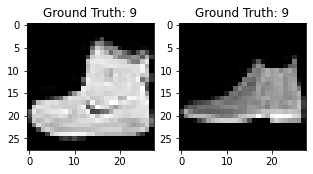

In [179]:
plt.figure(figsize=(5,5))

#Display first image in training data
plt.subplot(1,2,1)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(y_train[0]))

#Display the first image of test data
plt.subplot(1,2,2)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(y_test[0]))

In [180]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [181]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [182]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [183]:
# one-hot encoding of labels
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [184]:
print("Original label: {}".format(y_train[0]))
print("Encoded label: {}".format(y_train_one_hot[0]))

Original label: 9
Encoded label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X_train, X_val, label_train, label_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=101)

In [187]:
X_train.shape, X_val.shape, label_train.shape, label_val.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [188]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import batch_normalization
from keras.layers.advanced_activations import LeakyReLU

In [189]:
batch_size = 64
epochs = 20
num_classes = 10

In [194]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28, 28, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [195]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_36 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                     

In [196]:
fashion_train = model.fit(X_train, label_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, label_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - ETA: 0s - loss: 0.6031 - accuracy: 0.7774

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


48000/48000 [==============================] - 96s 2ms/sample - loss: 0.6031 - accuracy: 0.7774 - val_loss: 0.3620 - val_accuracy: 0.8667
Epoch 2/20
48000/48000 [==============================] - 95s 2ms/sample - loss: 0.3778 - accuracy: 0.8615 - val_loss: 0.2954 - val_accuracy: 0.8928
Epoch 3/20
48000/48000 [==============================] - 95s 2ms/sample - loss: 0.3277 - accuracy: 0.8801 - val_loss: 0.2687 - val_accuracy: 0.9003
Epoch 4/20
48000/48000 [==============================] - 95s 2ms/sample - loss: 0.3004 - accuracy: 0.8896 - val_loss: 0.2509 - val_accuracy: 0.9061
Epoch 5/20
48000/48000 [==============================] - 95s 2ms/sample - loss: 0.2830 - accuracy: 0.8939 - val_loss: 0.2428 - val_accuracy: 0.9121
Epoch 6/20
48000/48000 [==============================] - 95s 2ms/sample - loss: 0.2719 - accuracy: 0.8984 - val_loss: 0.2303 - val_accuracy: 0.9174
Epoch 7/20
48000/48000 [==============================] - 94s 2ms/sample - loss: 0.2573 - accuracy: 0.9049 - val_loss

In [197]:
model.save('fash_mnist.h5')

In [198]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)

In [199]:
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

Test Loss:  0.22510401805639266
Test Accuracy:  0.9207


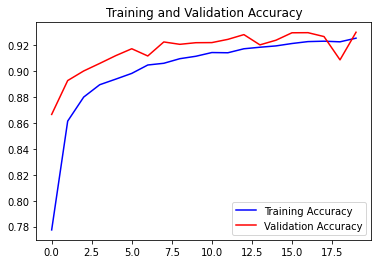

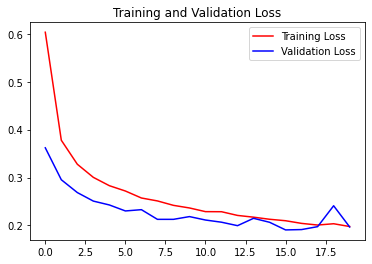

In [200]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'r', label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()


In [203]:
predicted_classes = model.predict(X_test)

In [205]:
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)

In [206]:
predicted_classes.shape, y_test.shape

((10000,), (10000,))

In [207]:
correct = np.where(predicted_classes == y_test)[0]
print("Found {} correct labels".format(len(correct)))

Found 9182 correct labels


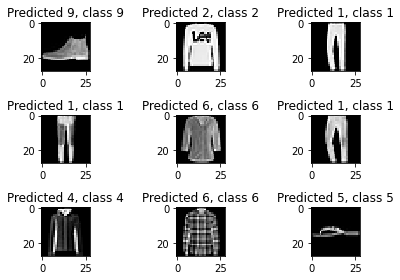

In [208]:
for i, correct in enumerate(correct[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, class {}".format(predicted_classes[correct], y_test[correct]))
  plt.tight_layout()

In [209]:
incorrect = np.where(predicted_classes != y_test)[0]
print("Found {} incorrect labels".format(len(incorrect)))

Found 818 incorrect labels


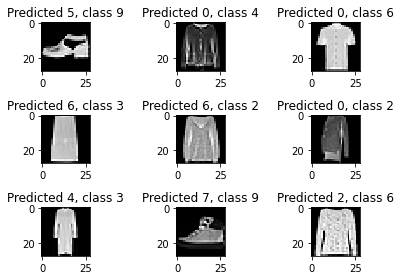

In [210]:
for i, incorrect in enumerate(incorrect[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Predicted {}, class {}".format(predicted_classes[incorrect], y_test[incorrect]))
  plt.tight_layout()

In [211]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.92      0.84      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.87      0.89      0.88      1000
     Class 3       0.93      0.93      0.93      1000
     Class 4       0.88      0.86      0.87      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.83      0.70      0.76      1000
     Class 7       0.95      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [90]:
# from keract import display_activations, get_activations, display_heatmaps

In [91]:
# img = X_test[0].reshape(1, 28, 28, 1)
# activations = get_activations(model, img)
# display_activations(activations)


In [120]:
# from tensorflow.keras.utils import plot_model
# plot_model(model)

In [217]:
# retriever = model.output[:, np.argmax(predicted_classes[0])]

In [224]:
import cv2
from keras import backend as K

def get_heatmap(img):
  x = img
  pred = model.predict(x)
  class_idx = np.argmax(pred)
  class_output = model.output[:, class_idx]
  last_conv_layer = model.layers[15]
  grads = K.gradients(class_output, last_conv_layer.output)[0]

  pooled_grads = K.mean(grads, axis=(0, 1, 2))    
  iterate = K.function([model.inputs], [pooled_grads, last_conv_layer.output[0]]) 
  pooled_grads_value, conv_layer_output_value = iterate([x])   
  conv_layer_output_value[-1, -1, :] *= pooled_grads_value

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[2]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  heatmap.shape
  x = x.reshape((28, 28))
  x=cv2.cvtColor(x.astype('uint8'), cv2.COLOR_GRAY2RGB)
  superimposed_img = cv2.addWeighted(x, 0.6, heatmap, 0.4, 0)

  return superimposed_img, heatmap

In [229]:
# image, heatmap = get_heatmap(X_test[5].reshape(1, 28, 28, 1))